In [3]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Introduction to the Data

The dataset consists of different information or features about Houses and I will use this features to predict the Sale Price of a particular House.

In this project, I'll:

- Prepare the data for machine learning
- Train a model
- Measure the accuracy of your model
- Prepare and make a Kaggle submission.

I will drop features that totally leak information about the Sale Price, cause this will make the model overfit

In [4]:
import pandas as pd

train = pd.read_csv("kaggletrain.csv")
test = pd.read_csv("kaggletest.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Features Selection

In [9]:
train["GarageFinish"].value_counts(normalize=True, dropna=False) * 100

Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64

In [10]:
drop_columns = ['MSSubClass', 'MSZoning','MoSold', 'YrSold', 'SaleType','SaleCondition','LotFrontage',
               "Street","Alley","LandContour","Utilities","LandSlope","Condition2","Condition1",
               "OverallCond","RoofMatl","Exterior2nd","MasVnrType","ExterQual","ExterCond","BsmtCond","BsmtFinSF1",
               "BsmtFinType2", "BsmtFinSF2","BsmtUnfSF","Heating","CentralAir","Electrical","LowQualFinSF","BsmtHalfBath",
               "BsmtFullBath","FullBath","HalfBath","KitchenAbvGr","KitchenQual","Functional","FireplaceQu","GarageType",
               "GarageYrBlt","GarageArea","GarageQual","GarageCond","PavedDrive","EnclosedPorch","WoodDeckSF", "3SsnPorch", 
                'ScreenPorch', 'PoolArea', 'PoolQC',"Fence","MiscFeature","MiscVal"]

In [11]:
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [12]:
train

,Id,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,...,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,OpenPorchSF,SalePrice
0,1,8450,Reg,Inside,CollgCr,1Fam,2Story,7,2003,2003,...,856,854,1710,3,8,0,RFn,2,61,208500
1,2,9600,Reg,FR2,Veenker,1Fam,1Story,6,1976,1976,...,1262,0,1262,3,6,1,RFn,2,0,181500
2,3,11250,IR1,Inside,CollgCr,1Fam,2Story,7,2001,2002,...,920,866,1786,3,6,1,RFn,2,42,223500
3,4,9550,IR1,Corner,Crawfor,1Fam,2Story,7,1915,1970,...,961,756,1717,3,7,1,Unf,3,35,140000
4,5,14260,IR1,FR2,NoRidge,1Fam,2Story,8,2000,2000,...,1145,1053,2198,4,9,1,RFn,3,84,250000
5,6,14115,IR1,Inside,Mitchel,1Fam,1.5Fin,5,1993,1995,...,796,566,1362,1,5,0,Unf,2,30,143000
6,7,10084,Reg,Inside,Somerst,1Fam,1Story,8,2004,2005,...,1694,0,1694,3,7,1,RFn,2,57,307000
7,8,10382,IR1,Corner,NWAmes,1Fam,2Story,7,1973,1973,...,1107,983,2090,3,7,2,RFn,2,204,200000
8,9,6120,Reg,Inside,OldTown,1Fam,1.5Fin,7,1931,1950,...,1022,752,1774,2,8,2,Unf,2,0,129900
9,10,7420,Reg,Corner,BrkSide,2fmCon,1.5Unf,5,1939,1950,...,1077,0,1077,2,5,2,RFn,1,4,118000


In [13]:
test

,Id,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,...,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,OpenPorchSF
0,1461,11622,Reg,Inside,NAmes,1Fam,1Story,5,1961,1961,...,TA,896,0,896,2,5,0,Unf,1.0,0
1,1462,14267,IR1,Corner,NAmes,1Fam,1Story,6,1958,1958,...,TA,1329,0,1329,3,6,0,Unf,1.0,36
2,1463,13830,IR1,Inside,Gilbert,1Fam,2Story,5,1997,1998,...,Gd,928,701,1629,3,6,1,Fin,2.0,34
3,1464,9978,IR1,Inside,Gilbert,1Fam,2Story,6,1998,1998,...,Ex,926,678,1604,3,7,1,Fin,2.0,36
4,1465,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,1992,1992,...,Ex,1280,0,1280,2,5,0,RFn,2.0,82
5,1466,10000,IR1,Corner,Gilbert,1Fam,2Story,6,1993,1994,...,Gd,763,892,1655,3,7,1,Fin,2.0,84
6,1467,7980,IR1,Inside,Gilbert,1Fam,1Story,6,1992,2007,...,Ex,1187,0,1187,3,6,0,Fin,2.0,21
7,1468,8402,IR1,Inside,Gilbert,1Fam,2Story,6,1998,1998,...,Gd,789,676,1465,3,7,1,Fin,2.0,75
8,1469,10176,Reg,Inside,Gilbert,1Fam,1Story,7,1990,1990,...,Gd,1341,0,1341,2,5,1,Unf,2.0,0
9,1470,8400,Reg,Corner,NAmes,1Fam,1Story,4,1970,1970,...,TA,882,0,882,2,4,0,Fin,2.0,0


In [14]:
train.columns

Index(['Id', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageFinish', 'GarageCars', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

## Finding missing NaN values

In [15]:
test.isnull().sum()

Id               0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      1
MasVnrArea      15
Foundation       0
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
TotalBsmtSF      1
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageFinish    78
GarageCars       1
OpenPorchSF      0
dtype: int64

In [16]:
train["GarageFinish"] = train["GarageFinish"].fillna("No Garage")
test["GarageFinish"] = test["GarageFinish"].fillna("No Garage")

In [17]:
test.isnull().sum()

Id               0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      1
MasVnrArea      15
Foundation       0
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
TotalBsmtSF      1
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageFinish     0
GarageCars       1
OpenPorchSF      0
dtype: int64

In [18]:
print(train["Exterior1st"].value_counts(normalize=True, dropna=False) *100)

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
ImStucc     0.068493
AsphShn     0.068493
CBlock      0.068493
Name: Exterior1st, dtype: float64


In [19]:
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("None")
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("None")
train["GarageCars"] = train["GarageCars"].fillna(2)
test["GarageCars"] = test["GarageCars"].fillna(2)
train["TotalBsmtSF"] = train["TotalBsmtSF"].fillna(0)
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(0)
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("Unf")
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("Unf")
train["BsmtExposure"] = train["BsmtExposure"].fillna("Av")
test["BsmtExposure"] = test["BsmtExposure"].fillna("Av")
train["BsmtQual"] = train["BsmtQual"].fillna("Ex")
test["BsmtQual"] = test["BsmtQual"].fillna("Ex")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
train["Exterior1st"] = train["Exterior1st"].fillna("Vinylsd")
test["Exterior1st"] = test["Exterior1st"].fillna("Vinylsd")

In [20]:
test.isnull().sum()
train.isnull().sum()

Id              0
LotArea         0
LotShape        0
LotConfig       0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
MasVnrArea      0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageFinish    0
GarageCars      0
OpenPorchSF     0
SalePrice       0
dtype: int64

## Engineering New Features

In [21]:
t = train[train["YearBuilt"] == train["YearRemodAdd"]] 
t = train["YearBuilt"]
t = train[train["YearBuilt"] != train["YearRemodAdd"]]
t = train["YearRemodAdd"]
train["Year"] = t
train["Year"]

0       2003
1       1976
2       2002
3       1970
4       2000
5       1995
6       2005
7       1973
8       1950
9       1950
10      1965
11      2006
12      1962
13      2007
14      1960
15      2001
16      1970
17      1967
18      2004
19      1965
20      2006
21      1950
22      2002
23      1976
24      2001
25      2007
26      2000
27      2008
28      1997
29      1950
        ... 
1430    2005
1431    1976
1432    2007
1433    2000
1434    1977
1435    2005
1436    1971
1437    2008
1438    1996
1439    1979
1440    1994
1441    2004
1442    2008
1443    1950
1444    2004
1445    1966
1446    1962
1447    1996
1448    2000
1449    1970
1450    1974
1451    2009
1452    2005
1453    2006
1454    2005
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: Year, Length: 1460, dtype: int64

In [22]:
b = test[test["YearBuilt"] == test["YearRemodAdd"]] 
b = test["YearBuilt"]
b = test[test["YearBuilt"] != test["YearRemodAdd"]]
b = test["YearRemodAdd"]
test["Year"] = b


In [23]:
train["Year"].value_counts(dropna=False)

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: Year, Length: 61, dtype: int64

In [24]:
train["Year"].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: Year, dtype: float64

In [25]:
train["Year"].value_counts(dropna=False)

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: Year, Length: 61, dtype: int64

In [26]:
def cat_year(col):
        if col < 1965:
            return  4
        elif col < 1985:
            return 3
        elif col < 1996:
            return 2
        else:
            return 1
    

In [27]:
test["Year"] = test["Year"].apply(cat_year)
train["Year"] = train["Year"].apply(cat_year)

In [28]:
test["Year"]

0       4
1       4
2       1
3       1
4       2
5       2
6       1
7       1
8       2
9       3
10      1
11      3
12      3
13      3
14      3
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1429    4
1430    4
1431    4
1432    4
1433    4
1434    1
1435    1
1436    3
1437    3
1438    1
1439    3
1440    4
1441    1
1442    1
1443    1
1444    4
1445    1
1446    3
1447    1
1448    3
1449    3
1450    3
1451    3
1452    3
1453    3
1454    3
1455    3
1456    1
1457    2
1458    2
Name: Year, Length: 1459, dtype: int64

In [29]:
train["Year"]

0       1
1       3
2       1
3       3
4       1
5       2
6       1
7       3
8       4
9       4
10      3
11      1
12      4
13      1
14      4
15      1
16      3
17      3
18      1
19      3
20      1
21      4
22      1
23      3
24      1
25      1
26      1
27      1
28      1
29      4
       ..
1430    1
1431    3
1432    1
1433    1
1434    3
1435    1
1436    3
1437    1
1438    1
1439    3
1440    2
1441    1
1442    1
1443    4
1444    1
1445    3
1446    4
1447    1
1448    1
1449    3
1450    3
1451    1
1452    1
1453    1
1454    1
1455    1
1456    2
1457    1
1458    1
1459    3
Name: Year, Length: 1460, dtype: int64

In [30]:
train["Total_floor"] = train['1stFlrSF'] + train['2ndFlrSF']
test["Total_floor"] = test['1stFlrSF'] + test['2ndFlrSF']

In [31]:
train["Total_floor"].describe()

count    1460.000000
mean     1509.619178
std       521.163523
min       334.000000
25%      1123.750000
50%      1458.000000
75%      1775.250000
max      5642.000000
Name: Total_floor, dtype: float64

In [32]:
def cat_flr(col):
        if col < 1000:
            return  1
        elif col < 1800:
            return 2
        elif col < 3000:
            return 3
        else:
            return 4

In [33]:
test["Total_floor"] = test["Total_floor"].apply(cat_flr)
train["Total_floor"] = train["Total_floor"].apply(cat_year)

In [34]:
train["Total_floor"]

0       4
1       4
2       4
3       4
4       1
5       4
6       4
7       1
8       4
9       4
10      4
11      1
12      4
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      1
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
       ..
1430    4
1431    4
1432    4
1433    4
1434    4
1435    4
1436    4
1437    4
1438    4
1439    4
1440    1
1441    4
1442    1
1443    4
1444    4
1445    4
1446    4
1447    1
1448    4
1449    4
1450    4
1451    4
1452    4
1453    4
1454    4
1455    4
1456    1
1457    1
1458    4
1459    4
Name: Total_floor, Length: 1460, dtype: int64

In [35]:
train["1stFlrSF"]

0        856
1       1262
2        920
3        961
4       1145
5        796
6       1694
7       1107
8       1022
9       1077
10      1040
11      1182
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      1158
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
        ... 
1430     734
1431     958
1432     968
1433     962
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1040
1440    1423
1441     848
1442    1026
1443     952
1444    1422
1445     913
1446    1188
1447    1220
1448     796
1449     630
1450     896
1451    1578
1452    1072
1453    1140
1454    1221
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

In [36]:
train = train.drop(["1stFlrSF"], axis=1)


In [37]:
train.columns

Index(['Id', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'GarageCars', 'OpenPorchSF', 'SalePrice', 'Year', 'Total_floor'],
      dtype='object')

In [38]:
train = train.drop(['2ndFlrSF','YearBuilt', 'YearRemodAdd'], axis=1)

In [39]:
test = test.drop(["1stFlrSF", '2ndFlrSF','YearBuilt', 'YearRemodAdd'], axis=1)

In [40]:
train.notnull().sum()
test.notnull().sum()

Id              1459
LotArea         1459
LotShape        1459
LotConfig       1459
Neighborhood    1459
BldgType        1459
HouseStyle      1459
OverallQual     1459
RoofStyle       1459
Exterior1st     1459
MasVnrArea      1459
Foundation      1459
BsmtQual        1459
BsmtExposure    1459
BsmtFinType1    1459
TotalBsmtSF     1459
HeatingQC       1459
GrLivArea       1459
BedroomAbvGr    1459
TotRmsAbvGrd    1459
Fireplaces      1459
GarageFinish    1459
GarageCars      1459
OpenPorchSF     1459
Year            1459
Total_floor     1459
dtype: int64

## Creating Categorical Columns

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
Id              1460 non-null int64
LotArea         1460 non-null int64
LotShape        1460 non-null object
LotConfig       1460 non-null object
Neighborhood    1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
RoofStyle       1460 non-null object
Exterior1st     1460 non-null object
MasVnrArea      1460 non-null float64
Foundation      1460 non-null object
BsmtQual        1460 non-null object
BsmtExposure    1460 non-null object
BsmtFinType1    1460 non-null object
TotalBsmtSF     1460 non-null int64
HeatingQC       1460 non-null object
GrLivArea       1460 non-null int64
BedroomAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageFinish    1460 non-null object
GarageCars      1460 non-null int64
OpenPorchSF     1460 non-null int64
SalePrice     

In [42]:
cat_columns = ["LotShape","Neighborhood","BldgType","Foundation","BsmtQual","BsmtExposure","HeatingQC","GarageFinish"]
dummy_df = pd.get_dummies(train[cat_columns])
train = pd.concat([train, dummy_df], axis=1)
train = train.drop(cat_columns, axis=1)

In [43]:
test_df = pd.get_dummies(test[cat_columns])
test = pd.concat([test, test_df], axis=1)
test = test.drop(cat_columns, axis=1)

In [44]:
train

,Id,LotArea,LotConfig,HouseStyle,OverallQual,RoofStyle,Exterior1st,MasVnrArea,BsmtFinType1,TotalBsmtSF,...,BsmtExposure_No,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,1,8450,Inside,2Story,7,Gable,VinylSd,196.0,GLQ,856,...,1,1,0,0,0,0,0,0,1,0
1,2,9600,FR2,1Story,6,Gable,MetalSd,0.0,ALQ,1262,...,0,1,0,0,0,0,0,0,1,0
2,3,11250,Inside,2Story,7,Gable,VinylSd,162.0,GLQ,920,...,0,1,0,0,0,0,0,0,1,0
3,4,9550,Corner,2Story,7,Gable,Wd Sdng,0.0,ALQ,756,...,1,0,0,1,0,0,0,0,0,1
4,5,14260,FR2,2Story,8,Gable,VinylSd,350.0,GLQ,1145,...,0,1,0,0,0,0,0,0,1,0
5,6,14115,Inside,1.5Fin,5,Gable,VinylSd,0.0,GLQ,796,...,1,1,0,0,0,0,0,0,0,1
6,7,10084,Inside,1Story,8,Gable,VinylSd,186.0,GLQ,1686,...,0,1,0,0,0,0,0,0,1,0
7,8,10382,Corner,2Story,7,Gable,HdBoard,240.0,ALQ,1107,...,0,1,0,0,0,0,0,0,1,0
8,9,6120,Inside,1.5Fin,7,Gable,BrkFace,0.0,Unf,952,...,1,0,0,1,0,0,0,0,0,1
9,10,7420,Corner,1.5Unf,5,Gable,MetalSd,0.0,GLQ,991,...,1,1,0,0,0,0,0,0,1,0


In [45]:
test

,Id,LotArea,LotConfig,HouseStyle,OverallQual,RoofStyle,Exterior1st,MasVnrArea,BsmtFinType1,TotalBsmtSF,...,BsmtExposure_No,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,1461,11622,Inside,1Story,5,Gable,VinylSd,0.0,Rec,882.0,...,1,0,0,0,0,1,0,0,0,1
1,1462,14267,Corner,1Story,6,Hip,Wd Sdng,108.0,ALQ,1329.0,...,1,0,0,0,0,1,0,0,0,1
2,1463,13830,Inside,2Story,5,Gable,VinylSd,0.0,GLQ,928.0,...,1,0,0,1,0,0,1,0,0,0
3,1464,9978,Inside,2Story,6,Gable,VinylSd,20.0,GLQ,926.0,...,1,1,0,0,0,0,1,0,0,0
4,1465,5005,Inside,1Story,8,Gable,HdBoard,0.0,ALQ,1280.0,...,1,1,0,0,0,0,0,0,1,0
5,1466,10000,Corner,2Story,6,Gable,HdBoard,0.0,Unf,763.0,...,1,0,0,1,0,0,1,0,0,0
6,1467,7980,Inside,1Story,6,Gable,HdBoard,0.0,ALQ,1168.0,...,1,1,0,0,0,0,1,0,0,0
7,1468,8402,Inside,2Story,6,Gable,VinylSd,0.0,Unf,789.0,...,1,0,0,1,0,0,1,0,0,0
8,1469,10176,Inside,1Story,7,Gable,HdBoard,0.0,GLQ,1300.0,...,0,0,0,1,0,0,0,0,0,1
9,1470,8400,Corner,1Story,4,Gable,Plywood,0.0,ALQ,882.0,...,1,0,0,0,0,1,1,0,0,0


In [46]:
train_features = train.drop(["Id", "SalePrice"], axis=1)
test_features = test.drop(["Id"], axis=1)

## Finding the most Relevant Features

In [47]:
print(train_features.columns)

Index(['LotArea', 'LotConfig', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'Exterior1st', 'MasVnrArea', 'BsmtFinType1', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'OpenPorchSF', 'Year', 'Total_floor', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_

In [48]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
LotArea                   1460 non-null int64
LotConfig                 1460 non-null object
HouseStyle                1460 non-null object
OverallQual               1460 non-null int64
RoofStyle                 1460 non-null object
Exterior1st               1460 non-null object
MasVnrArea                1460 non-null float64
BsmtFinType1              1460 non-null object
TotalBsmtSF               1460 non-null int64
GrLivArea                 1460 non-null int64
BedroomAbvGr              1460 non-null int64
TotRmsAbvGrd              1460 non-null int64
Fireplaces                1460 non-null int64
GarageCars                1460 non-null int64
OpenPorchSF               1460 non-null int64
Year                      1460 non-null int64
Total_floor               1460 non-null int64
LotShape_IR1              1460 non-null uint8
LotShape_IR2              1460 non-null uint8
LotShape_IR3

In [49]:
train_features = train_features.drop(["BsmtFinType1", "Exterior1st","LotConfig", "HouseStyle", "RoofStyle"], axis=1)             

In [50]:
test_features = test_features.drop(["BsmtFinType1", "Exterior1st","LotConfig", "HouseStyle", "RoofStyle"], axis=1)             

In [51]:
test_features

,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,...,BsmtExposure_No,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,11622,5,0.0,882.0,896,2,5,0,1.0,0,...,1,0,0,0,0,1,0,0,0,1
1,14267,6,108.0,1329.0,1329,3,6,0,1.0,36,...,1,0,0,0,0,1,0,0,0,1
2,13830,5,0.0,928.0,1629,3,6,1,2.0,34,...,1,0,0,1,0,0,1,0,0,0
3,9978,6,20.0,926.0,1604,3,7,1,2.0,36,...,1,1,0,0,0,0,1,0,0,0
4,5005,8,0.0,1280.0,1280,2,5,0,2.0,82,...,1,1,0,0,0,0,0,0,1,0
5,10000,6,0.0,763.0,1655,3,7,1,2.0,84,...,1,0,0,1,0,0,1,0,0,0
6,7980,6,0.0,1168.0,1187,3,6,0,2.0,21,...,1,1,0,0,0,0,1,0,0,0
7,8402,6,0.0,789.0,1465,3,7,1,2.0,75,...,1,0,0,1,0,0,1,0,0,0
8,10176,7,0.0,1300.0,1341,2,5,1,2.0,0,...,0,0,0,1,0,0,0,0,0,1
9,8400,4,0.0,882.0,882,2,4,0,2.0,0,...,1,0,0,0,0,1,1,0,0,0


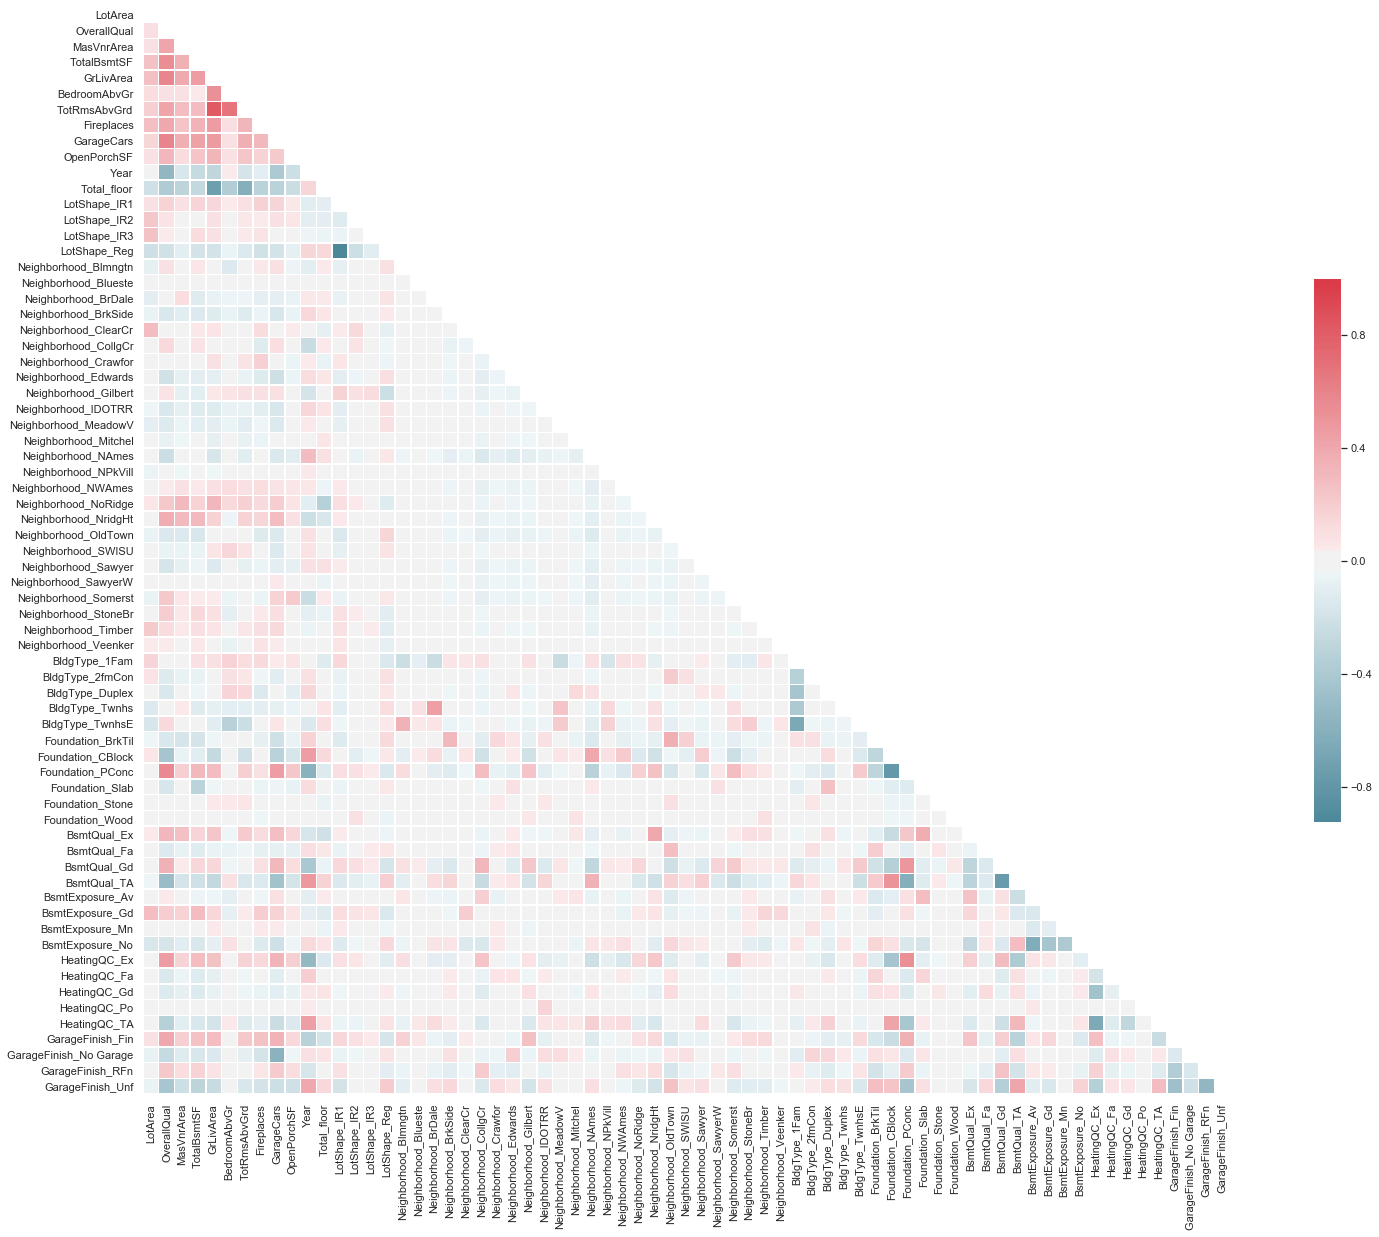

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(30, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = train_features
plot_correlation_heatmap(columns)

In [53]:
train_features.columns

Index(['LotArea', 'OverallQual', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'OpenPorchSF', 'Year', 'Total_floor', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgTyp

## Final Feature Selection using RFECV

In [54]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression


columns = ['LotArea', 'MasVnrArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
   'OpenPorchSF', 'Total_floor', 'LotShape_IR2',
   'LotShape_IR3',  'Neighborhood_Blmngtn',
   'Neighborhood_Blueste', 'Neighborhood_BrkSide',
   'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
   'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
   'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
   'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
   'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
   'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
   'Neighborhood_StoneBr',  'Neighborhood_Veenker',
   'BldgType_1Fam', 'BldgType_Duplex',
   'BldgType_TwnhsE', 'Foundation_BrkTil',
   'Foundation_Stone', 
   'BsmtQual_Ex', 'BsmtQual_Fa',
   'BsmtExposure_Av', 'BsmtExposure_Gd',
   'BsmtExposure_No',  'HeatingQC_Fa',
   'HeatingQC_Po', 
   'GarageFinish_No Garage', 'GarageFinish_RFn']
all_X = train_features[columns]
all_y = train["SalePrice"]
lr = LinearRegression()
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]
print(optimized_columns)

Index(['MasVnrArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'OpenPorchSF', 'Total_floor', 'LotShape_IR2', 'LotShape_IR3',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_1Fam',
       'BldgType_Duplex', 'BldgType_TwnhsE', 'Foundation_BrkTil',
       'Foundation_Stone', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtExposure_Av',
       'BsmtExposure_Gd', 'BsmtExposure_No', 'HeatingQC_Fa', 'HeatingQC_Po',
       'Garage

In [55]:
from sklearn.model_selection import cross_val_score
all_X = train_features[optimized_columns]
all_y = train["SalePrice"]
lr = LinearRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(accuracy)

0.8045516758569139


In [56]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()
print(accuracy_rf )

0.7904892802658943


In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=12)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_dt = scores.mean()
print(accuracy_dt )

0.7904892802658943


## Model Selection and Tuning Using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestRegressor(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=15)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

In [59]:
print(best_score)
print(best_params)

0.8024904479356976
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}


In [60]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [61]:
test_features[optimized_columns]

,MasVnrArea,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,Total_floor,LotShape_IR2,LotShape_IR3,Neighborhood_Blmngtn,...,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_No,HeatingQC_Fa,HeatingQC_Po,GarageFinish_No Garage,GarageFinish_RFn
0,0.0,882.0,5,0,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,108.0,1329.0,6,0,1.0,36,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,928.0,6,1,2.0,34,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,20.0,926.0,7,1,2.0,36,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,1280.0,5,0,2.0,82,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0.0,763.0,7,1,2.0,84,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0.0,1168.0,6,0,2.0,21,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0.0,789.0,7,1,2.0,75,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0.0,1300.0,5,1,2.0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0.0,882.0,4,0,2.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Submitting our Model to Kaggle

In [62]:
best_rf = grid.best_estimator_
holdout_predictions = best_rf.predict(test_features[optimized_columns])

holdout_ids = test["Id"]
submission_df = {"Id": holdout_ids,
                 "SalePrice": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("House_Prediction_Random_Forest.csv",index=False)

In [63]:
lr = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,parameters, cv=10)
grid.fit(all_X, all_y)





best_params = grid.best_params_
best_score = grid.best_score_


In [64]:
print(best_score)
print(best_params)

0.804551675856914
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [65]:
best_lr = grid.best_estimator_
holdout_predictions = best_lr.predict(test_features[optimized_columns])

holdout_ids = test["Id"]
submission_df = {"Id": holdout_ids,
                 "SalePrice": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("House_Prediction_linear_Regression.csv",index=False)